In [42]:
import pandas as pd


#df= pd.read_excel('df_content.xlsx')
df= pd.read_excel('cleaned_for_classification.xlsx')

In [43]:
df.head()

,Query,Engine,Content
0,Vessel caught misreporting catch amount,Google,sea shepherd global wednesday 05 jun 2024 sea ...
1,Vessel caught misreporting catch amount,Google,move the iuu fight up the food chain proceedi...
2,Vessel caught misreporting catch amount,Google,new rules tighten controls on eu today the env...
3,Vessel caught misreporting catch amount,Google,surprise media being misreporting the source o...
4,Vessel caught misreporting catch amount,Google,sea shepherd global monday 25 mar 2024 in a de...


In [46]:
# Find unique sources
unique_sources = df['Content'].nunique()
print("Unique sources by search engine:", df.groupby('Engine')['Content'].nunique())

Unique sources by search engine: Engine
Bing       99
Google    134
Yahoo       5
Name: Content, dtype: int64


In [47]:
# Drop rows where Engine is 'Yahoo'
df = df[df['Engine'] != 'Yahoo']

In [49]:
# Find unique sources
unique_sources = df['Content'].nunique()
print("Unique sources by search engine:", df.groupby('Engine')['Content'].nunique())

Unique sources by search engine: Engine
Bing       99
Google    134
Name: Content, dtype: int64


In [48]:
df.describe()

,Query,Engine,Content
count,287,287,287
unique,10,2,232
top,Vessel caught misreporting catch amount,Google,fishing vessel catches fire at port a fishing ...
freq,34,152,6


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


word_groups = [
    # About documents
    ['unreport', 'unreported', 'unreporting', 'unreports'],
    ['underreport', 'underreports', 'underreported', 'underreporting'],
    ['undocumented', 'undocument', 'undocumenting', 'undocuments'],
    ['misrepresent', 'misrepresented', 'misrepresenting', 'misreports'],
    ['register', 'registers', 'registered', 'registering', 'unregister', 'unregisters', 'unregistered', 'unregistering'],
    ['logbook', 'logged'],
    ['declaration', 'declare', 'declares', 'declared', 'declaring', 'underdeclaration', 'under-declaration'],
    ['label', 'mislabel', 'labeling', 'labeled', 'labels', 'mislabeling', 'mislabled', 'mislables'],
    # About being false
    ['false', 'falsify', 'falsifies', 'falsifying', 'falsifies', 'falsified', 'falsification', 'fake', 'manipulated', 'manipulate', 'manipulates'],
    ['fraud', 'fraudulence', 'hoax'],
    # About amounts
    ['volume', 'quota', 'exceed', 'exceeds', 'exceeded', 'exceeding', 'inflation'],
    # Fish, Ocean, port 
    ['catch', 'bycatch', 'harvest', 'juvenile', 'invasive'],
    ['farmed', 'farming'], 
    ['ocean', 'sea', 'seas'],
    ['port'],
    ['transshipment'],
    ['landing'],
    ['selective'],    
#    ['commercial', 'industrial'],
    # Crime
    ['offend', 'offended', 'offends', 'violate', 'violates', 'violated', 'violation'],
    ['regulation', 'regulate', 'regulated', 'regulates', 'regulating', 'regulations', 'regulates'],
    ['alter', 'altering', 'alters'],
    ['exploit', 'exploited', 'exploiting', 'exploits'],
    ['impose', 'imposed', 'imposes', 'imposing'],
    ['inspector', 'inspectors', 'inspect', 'inspects', 'inspected', 'inspecting','investigate', 'investigates', 'investigated','investigating','investigator'],
]

# Flatten the list of keywords

#keywords = [" ".join(keyword_list) for keyword_list in word_groups]

#[keyword for sublist in word_groups for keyword in sublist]

# Fill None values with an empty string
df = df.fillna('no content')


keywords = ["".join(keyword_list[0]) for keyword_list in word_groups]

# Initialize the vectorizer
vectorizer = TfidfVectorizer()


# Combine all text data (queries, titles, and content) for consistent vectorization
#all_texts = df['Query'].tolist() + df['Title'].tolist() \
#+ df['Content'].tolist()+ keywords
all_texts = df['Query'].tolist() + df['Content'].tolist()+ keywords



for text in all_texts:
    #rep_word_text(text, word_groups)
    text = rep_word_text(text, word_groups)

# Fit the vectorizer on all texts
vectorizer.fit(all_texts)

# Transform queries, titles, and content separately
query_vectors = vectorizer.transform(df['Query'].tolist())
content_vectors = vectorizer.transform(df['Content'].tolist())
keywords_vectors = vectorizer.transform(keywords)



# Calculate cosine similarity
relevance_scores_content = []
relevance_scores_keywords = []


for i in range(len(df)):
    query_vector = query_vectors[i]
    title_vector = title_vectors[i]
    content_vector = content_vectors[i]
   # keywords_vector = keywords_vectors[i]
    

    rs_content_q = cosine_similarity(query_vector, content_vector)[0][0]
    #rs_content_kw = cosine_similarity(keywords_vector, content_vector)[0][0]
    
     # Calculate the average similarity score for the keyword groups
    rs_content_kw = 0
    for j in range(len(keywords)):
        keywords_vector = keywords_vectors[j]
        rs_content_kw += cosine_similarity(keywords_vector, content_vector)[0][0]
    rs_content_kw /= len(keywords)  # Average similarity for all keyword groups
    

    relevance_scores_content.append(rs_content_q)
    relevance_scores_keywords.append(rs_content_kw)

# Add relevance scores to the DataFrame
df['rs_content_q'] = relevance_scores_content
df['rs_content_kw'] = relevance_scores_keywords


df.head(20)

,Query,Engine,Content,rs_content_q,rs_content_kw
0,Vessel caught misreporting catch amount,Google,sea shepherd global wednesday 05 jun 2024 sea ...,0.006025,0.003156
1,Vessel caught misreporting catch amount,Google,move the iuu fight up the food chain proceedi...,0.024368,0.011781
2,Vessel caught misreporting catch amount,Google,new rules tighten controls on eu today the env...,0.019884,0.008746
3,Vessel caught misreporting catch amount,Google,surprise media being misreporting the source o...,0.018916,0.000181
4,Vessel caught misreporting catch amount,Google,sea shepherd global monday 25 mar 2024 in a de...,0.017972,0.001052
5,Vessel caught misreporting catch amount,Google,ns boat captain 2 companies fined 125k for fis...,0.020625,0.000336
6,Vessel caught misreporting catch amount,Google,catching out cameras on boats reveal massive u...,0.006090,0.002412
7,Vessel caught misreporting catch amount,Google,noaa coast guard more regs needed in wake of r...,0.058755,0.007676
8,Vessel caught misreporting catch amount,Google,fish and overfishing how are fish stocks chang...,0.043386,0.004145
9,Vessel caught misreporting catch amount,Google,alaska fisherman given usd 1 million fine jail...,0.036589,0.006727


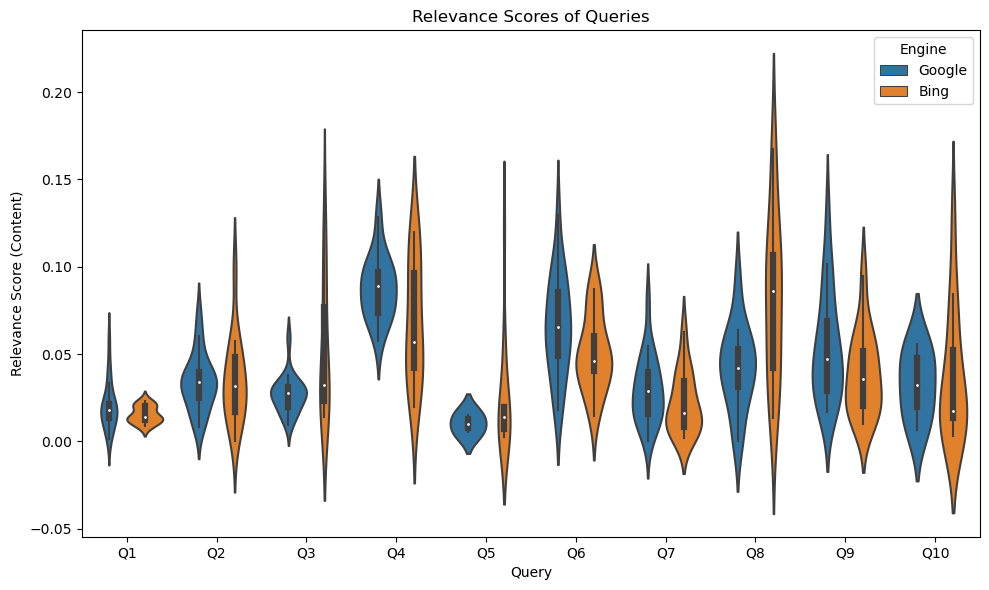

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)]  # Adjust range as per your actual number of queries

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Query", y="rs_content_q", hue="Engine", fill=False)
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Relevance Score (Content)')
plt.title('Relevance Scores of Queries')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()


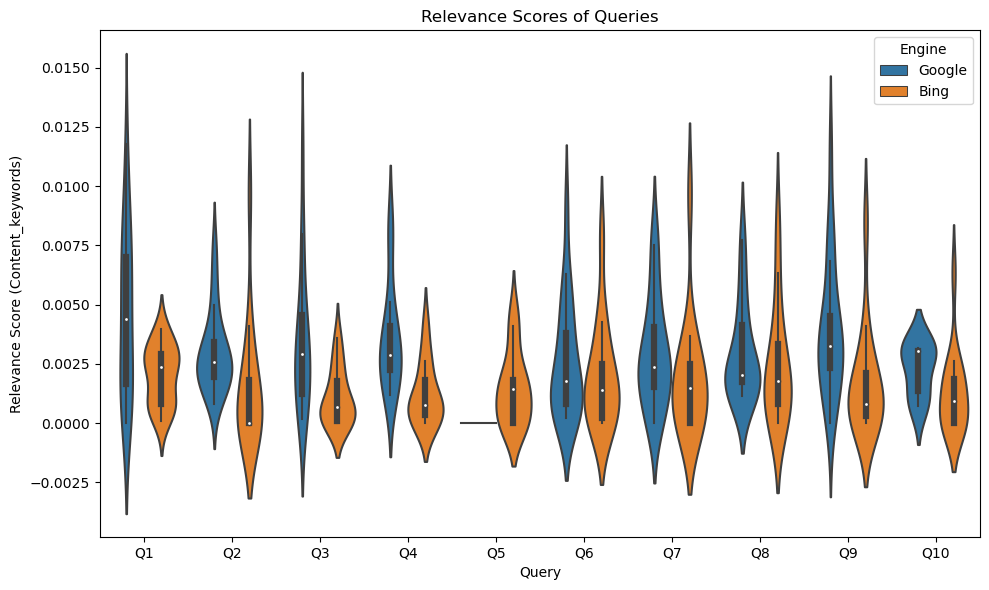

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)]  # Adjust range as per your actual number of queries

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Query", y="rs_content_kw", hue="Engine", fill=False)
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Relevance Score (Content_keywords)')
plt.title('Relevance Scores of Queries')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()


In [60]:
vectorizer = TfidfVectorizer()

# Calculate TF-IDF for the content
tfidf_matrix = vectorizer.fit_transform(df['Content'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Find unique sources
unique_sources = df['Content'].nunique()
print("Unique sources by search engine:", df.groupby('Engine')['Content'].nunique())

# Measure information novelty (average cosine similarity of each result with all previous results)
novelty_scores = []
for i in range(len(cosine_sim)):
    if i == 0:
        novelty_scores.append(1.0)  # First result is always novel
    else:
        novelty_scores.append(1 - cosine_sim[i, :i].max())

df['novelty_score'] = novelty_scores
print(df.groupby('Engine')['novelty_score'].mean().reset_index())

Unique sources by search engine: Engine
Bing       99
Google    134
Name: Content, dtype: int64
   Engine  novelty_score
0    Bing       0.361908
1  Google       0.429267


In [13]:
df.head(20)

,Query,Engine,Title,Dates,Link,Content,rs_title,rs_content_q,rs_content_kw,novelty_score
0,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,2 weeks ago,https://www.seashepherdglobal.org/latest-news/...,"Wednesday, 05 Jun, 2024 Sea Shepherd Global s...",0.0,0.007106,0.003140,1.000000
1,Vessel caught misreporting catch amount,Google,Move the IUU Fight Up the Food Chain | Proceed...,"Oct 31, 2023",https://www.usni.org/magazines/proceedings/202...,Drifting among the ice fields of the Bering S...,0.0,0.025171,0.011466,0.398730
2,Vessel caught misreporting catch amount,Google,New rules tighten controls on EU…,1 month ago,https://ejfoundation.org/news-media/new-rules-...,"Today, the Environmental Justice Foundation c...",0.0,0.020406,0.005851,0.644984
3,Vessel caught misreporting catch amount,Google,Surprise! Media is misreporting the source of ...,"Jul 26, 2023",https://electrek.co/2023/07/26/surprise-media-...,"Early this morning, the Fremantle Highway, a ...",0.0,0.015792,0.000197,0.556035
4,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,"Mar 25, 2024",https://www.seashepherdglobal.org/latest-news/...,"Monday, 25 Mar, 2024 In a decisive strike aga...",0.0,0.019297,0.001063,0.444095
5,Vessel caught misreporting catch amount,Google,"N.S. boat captain, 2 companies fined $125K for...","Sep 13, 2023",https://www.cbc.ca/news/canada/nova-scotia/n-s...,"A boat captain from Sambro, N.S., with a hist...",0.0,0.021166,0.000358,0.643848
6,Vessel caught misreporting catch amount,Google,Caught out: Cameras on boats reveal massive un...,"Apr 13, 2024",https://www.thepost.co.nz/politics/350242260/c...,no content,0.0,0.000000,0.000000,0.982034
7,Vessel caught misreporting catch amount,Google,"NOAA, Coast Guard: More regs needed in wake of...","Jan 17, 2022",https://www.heraldnews.com/story/news/2019/12/...,"NEWPORT, R.I. — Representatives from NOAA and...",0.0,0.095520,0.008717,0.560845
8,Vessel caught misreporting catch amount,Google,Fish and Overfishing,"Oct 11, 2021",https://ourworldindata.org/fish-and-overfishing,How are fish stocks changing across the world...,0.0,0.045256,0.004289,0.449987
9,Vessel caught misreporting catch amount,Google,"Alaska fisherman given USD 1 million fine, jai...","Aug 9, 2021",https://www.seafoodsource.com/news/business-fi...,Search Share A commercial fisherman in Ala...,0.0,0.023211,0.006467,0.709705


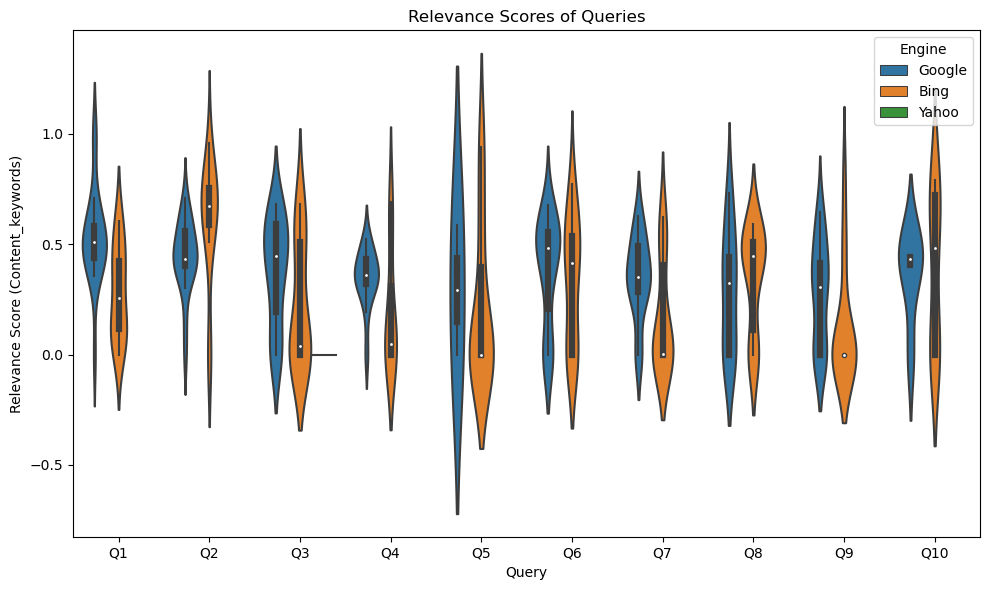

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)]  # Adjust range as per your actual number of queries

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Query", y="novelty_score", hue="Engine", fill=False)
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Relevance Score (Content_keywords)')
plt.title('Relevance Scores of Queries')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()

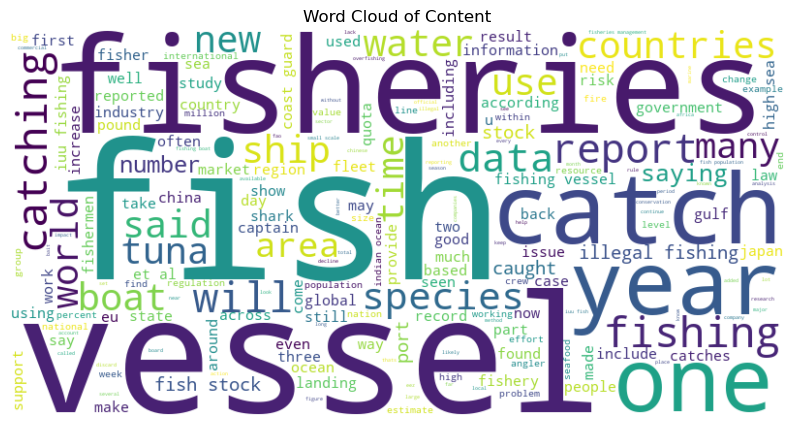

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all content into a single string
all_content = ' '.join(df['Content'].tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_content)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content')
plt.show()

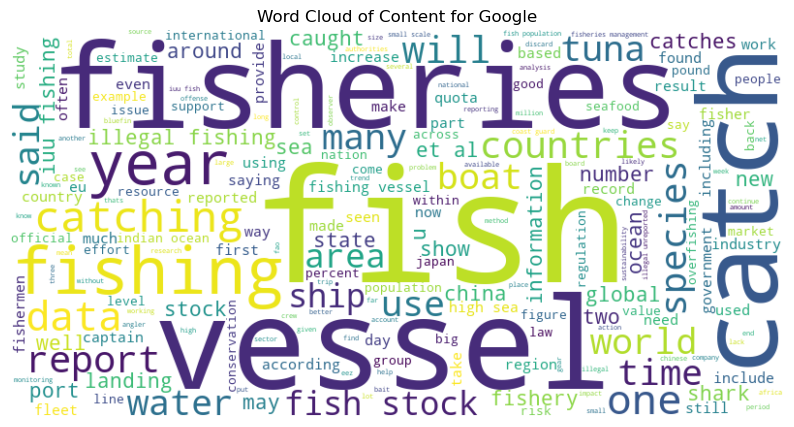

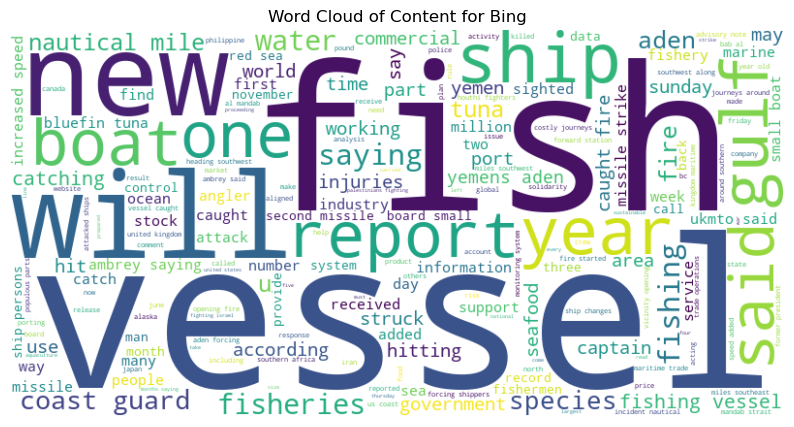

In [54]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns including 'Engine' and 'Content'
# Load your data into df (replace this with your actual data loading code)
# df = pd.read_csv('your_data.csv')  # Example data loading from a CSV file

# Get unique engines from the DataFrame
unique_engines = df['Engine'].unique()

# Iterate over each engine and generate a word cloud for its content
for engine in unique_engines:
    # Filter data for the current engine
    engine_data = df[df['Engine'] == engine]
    
    # Combine content for the current engine into a single string
    all_content = ' '.join(engine_data['Content'].astype(str))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_content)
    
    # Display the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of Content for {engine}')
    plt.show()


In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your data into a DataFrame (replace with your actual data loading code)
# df = pd.read_csv('your_data.csv')

# Preprocess content (cleaning, tokenization, etc.)
# Example assumes 'Content' is already cleaned and tokenized into 'clean_content' column

# Compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Content'])

# Measure cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Initialize dictionary to store engine scores
engine_scores = {}
engines = df['Engine'].unique()

# Calculate relevance scores for each engine
for engine in engines:
    engine_data = df[df['Engine'] == engine]
    engine_indices = engine_data.index
    
    # Average cosine similarity across all content for the engine
    relevance_scores = cosine_similarities[engine_indices][:, engine_indices]
    average_relevance_score = relevance_scores.mean()  # Calculate mean along both dimensions
    
    engine_scores[engine] = average_relevance_score

# Rank engines based on average relevance score
ranked_engines = sorted(engine_scores.items(), key=lambda x: x[1], reverse=True)

# Print or visualize the rankings
for idx, (engine, score) in enumerate(ranked_engines):
    print(f"{idx + 1}. {engine}: {score}")



1. Yahoo: 1.0
2. Google: 0.09139080516527764
3. Bing: 0.06574703068515533


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the content
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Content'])

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the scores for the first document
tfidf_scores = tfidf_matrix[0].T.todense()
scores_df = pd.DataFrame(tfidf_scores, index=feature_names, columns=["score"])

# Sort and get the top 10 keywords
top_keywords = scores_df.sort_values(by="score", ascending=False).head(10)
print("Top 10 Keywords:")
print(top_keywords)


Top 10 Keywords:
                score
iuu          0.325276
fishing      0.314539
shepherd     0.212457
patrols      0.180776
illegal      0.156127
enforcement  0.134299
sea          0.132946
arrest       0.132029
benin        0.114001
coastal      0.111593
